In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


In [2]:
fashion_db = keras.datasets.fashion_mnist
(x_train_f, y_train_f), (x_test, y_test) = fashion_db.load_data()

In [3]:
x_valid, x_train = x_train_f[:5000]/255.0, x_train_f[5000:]/255.0
y_valid, y_train = y_train_f[:5000], y_train_f[5000:]

In [4]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10,  activation="softmax"))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 300)               1200      
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [14]:
model.layers

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
history = model.fit(x_train, y_train, 
                    epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5285 - accuracy: 0.8146 - val_loss: 0.3970 - val_accuracy: 0.8588
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4104 - accuracy: 0.8545 - val_loss: 0.3624 - val_accuracy: 0.8726
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3773 - accuracy: 0.8660 - val_loss: 0.3580 - val_accuracy: 0.8718
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3514 - accuracy: 0.8746 - val_loss: 0.3328 - val_accuracy: 0.8828
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3314 - accuracy: 0.8807 - val_loss: 0.3328 - val_accuracy: 0.8798
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3181 - accuracy: 0.8860 - val_loss: 0.3238 - val_accuracy: 0.8842
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3056 - accuracy: 0.8893 - val_loss: 0.3335 - val_accuracy:

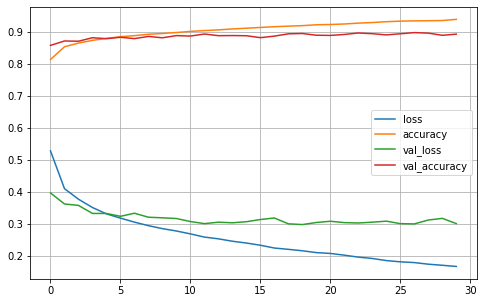

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical limit to [0, 1]
plt.show()

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 978.1741 - accuracy: 0.1911


[978.174072265625, 0.19110000133514404]